In [1]:
%config InlineBackend.figure_format='retina'

# adapt

In [ ]:
# %run -n main.py
# records = load_nerus(NERUS)
# records = log_progress(records)
# records = adapt_nerus(records)

# chunk = head(records, 500)
# lines = format_conll(chunk)
# dump_gz_lines(lines, DEV)

# chunk = head(records, 100000)
# lines = format_conll(chunk)
# dump_gz_lines(lines, TRAIN)

In [ ]:
# %run -n main.py
# navec = Navec.load(NAVEC)
# model = navec.as_gensim
# model.save_word2vec_format(EMB)
# !gzip {EMB}

In [ ]:
# %run -n main.py
# s3 = S3()
# s3.upload(TRAIN, S3_TRAIN)
# s3.upload(DEV, S3_DEV)
# s3.upload(EMB + GZ, S3_EMB)

# grid

## prune

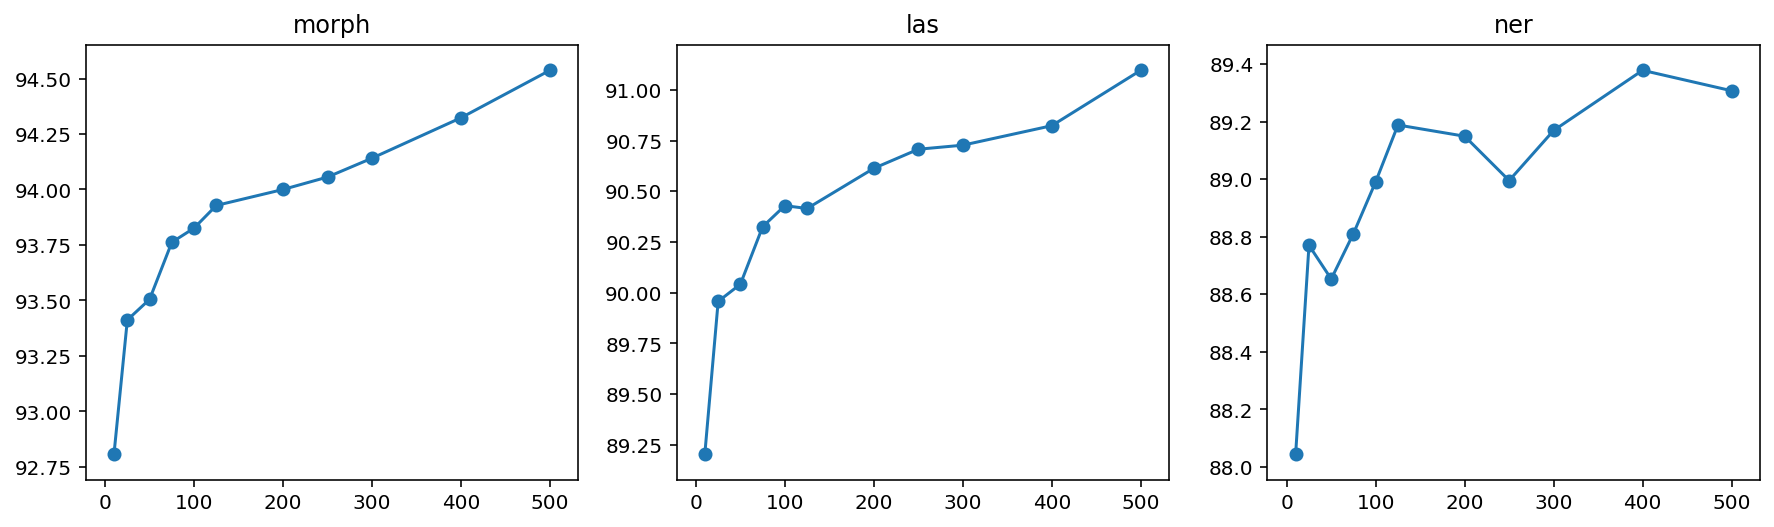

In [2]:
%run -n main.py
sizes = [10, 25, 50, 75, 100, 125, 200, 250, 300, 400, 500]
paths = [
    join(LOGS_DIR, f'{_}k_2k.txt')
    for _ in sizes
]

scores = load_scores(paths)    
show_scores(scores, sizes)

## train

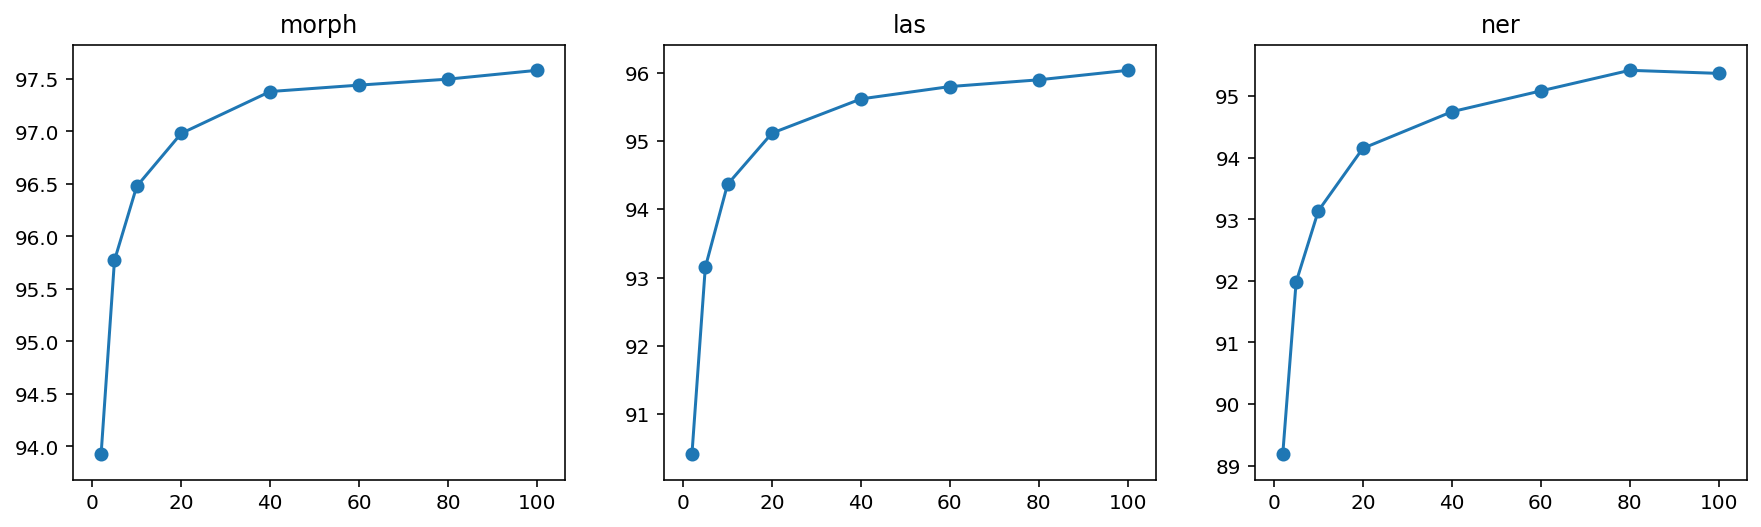

In [3]:
sizes = [2, 5, 10, 20, 40, 60, 80, 100]
paths = [
    join(LOGS_DIR, f'125k_{_}k.txt')
    for _ in sizes
]

scores = load_scores(paths)    
show_scores(scores, sizes)

# package

In [ ]:
name = '125k_100k'

In [ ]:
%run -n main.py
path = join(MODELS_DIR, name, META + JSON)
meta = load_json(path)
patch = {
    'name': 'core_news_md',
    'lang': 'ru',
    'version': '2.3.0',
    'spacy_version': '>=2.3.0,<2.4.0',
    'description': 'Russian multitask CNN initialized with Navec embeddings trained on Nerus dataset. Assigns context-specific token vectors, POS tags, dependency parse and named entities.',
    'author': 'Yuri Baburov, Alexander Kukushkin',
    'email': 'burchik@gmail.com, alex@alexkuk.ru',
    'url': 'https://github.com/natasha/natasha-spacy',
    'license': 'MIT',
    'sources':[
        {
            'name': 'Nerus',
            'url': 'https://github.com/natasha/nerus',
        },
        {
            'name': 'Navec',
            'url': 'https://github.com/natasha/navec'
        }
    ],
}
meta.update(patch)
dump_json(meta, path)

In [ ]:
dir = join(MODELS_DIR, name)
!mkdir package
!spacy package {dir} package
!cd package/*; python setup.py sdist
!mv package/*/dist/*.tar.gz .
!rm -r package

In [ ]:
path = 'ru_core_news_md-2.3.0.tar.gz'
s3.upload(path, 'models/' + path)

# usage

In [ ]:
import spacy
# Use ipymarkup for NER and syntax visualization
from ipymarkup import show_dep_ascii_markup, show_span_ascii_markup

nlp = spacy.load('ru_core_news_md')
text = 'Посол Израиля на Украине Йоэль Лион признался, что пришел в шок, узнав о решении властей Львовской области объявить 2019 год годом лидера запрещенной в России Организации украинских националистов (ОУН) Степана Бандеры. Свое заявление он разместил в Twitter. «Я не могу понять, как прославление тех, кто непосредственно принимал участие в ужасных антисемитских преступлениях, помогает бороться с антисемитизмом и ксенофобией. Украина не должна забывать о преступлениях, совершенных против украинских евреев, и никоим образом не отмечать их через почитание их исполнителей», — написал дипломат. 11 декабря Львовский областной совет принял решение провозгласить 2019 год в регионе годом Степана Бандеры в связи с празднованием 110-летия со дня рождения лидера ОУН (Бандера родился 1 января 1909 года). В июле аналогичное решение принял Житомирский областной совет. В начале месяца с предложением к президенту страны Петру Порошенко вернуть Бандере звание Героя Украины обратились депутаты Верховной Рады. Парламентарии уверены, что признание Бандеры национальным героем поможет в борьбе с подрывной деятельностью против Украины в информационном поле, а также остановит «распространение мифов, созданных российской пропагандой». Степан Бандера (1909-1959) был одним из лидеров Организации украинских националистов, выступающей за создание независимого государства на территориях с украиноязычным населением. В 2010 году в период президентства Виктора Ющенко Бандера был посмертно признан Героем Украины, однако впоследствии это решение было отменено судом. '
doc = nlp(text)

In [ ]:
spans = [
    (_.start_char, _.end_char, _.label_)
    for _ in doc.ents
]
show_span_ascii_markup(doc.text, spans)

In [ ]:
sent = next(doc.sents)

In [ ]:
for token in sent:
    print(token.text.ljust(10), token.lemma_.ljust(10), token.tag_)

In [ ]:
words = [_.text for _ in sent]
deps = [
    (_.head.i, _.i, _.dep_)
    for _ in sent
    if _.i != _.head.i
]
show_dep_ascii_markup(words, deps)